In [44]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '09469f48-2b92-40e3-8c7b-62c6b1e423d2',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-10-21T15:13:49.193Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 8838}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10496, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [45]:
type(data)

dict

In [46]:
import pandas as pd

In [47]:
pd.set_option('display.max_columns', None)

In [48]:
pd.set_option('display.max_rows', None)

In [49]:
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.Timestamp.now(tz='UTC')

In [50]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10496,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.951994e+07,1.951994e+07,False,NaN,1,NaN,NaN,None,2023-10-21T15:12:00.000Z,29846.960090,1.054747e+10,-54.5284,0.165553,0.821419,10.952033,12.255464,14.892864,-0.203230,5.826108e+11,51.3581,6.267862e+11,None,2023-10-21T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-21 15:14:05.005380+00:00
1,1027,Ethereum,ETH,ethereum,7585,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202658e+08,1.202658e+08,True,NaN,2,NaN,NaN,None,2023-10-21T15:12:00.000Z,1618.072507,3.661063e+09,-49.1238,0.225923,0.568629,4.337874,2.146494,-2.132681,-13.607964,1.945988e+11,17.1553,1.945988e+11,None,2023-10-21T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-21 15:14:05.005380+00:00
2,825,Tether USDt,USDT,tether,64113,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.415313e+10,8.762567e+10,True,NaN,3,NaN,NaN,None,2023-10-21T15:12:00.000Z,1.000280,2.907599e+10,-30.7724,0.008224,-0.022356,0.006649,0.043577,0.067904,0.028773,8.417673e+10,7.4208,8.765024e+10,None,2023-10-21T15:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-21 15:14:05.005380+00:00
3,1839,BNB,BNB,bnb,1690,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517052e+08,1.517052e+08,False,NaN,4,NaN,NaN,None,2023-10-21T15:12:00.000Z,213.754225,2.384403e+08,-33.3449,0.329067,0.094344,3.553692,1.404407,3.158342,-11.863268,3.242762e+10,2.8610,3.242762e+10,None,2023-10-21T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-21 15:14:05.005380+00:00
4,52,XRP,XRP,xrp,1119,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,None,2023-10-21T15:12:00.000Z,0.523736,8.000725e+08,-55.5460,1.042712,0.980571,7.837137,3.715472,2.080815,-29.429482,2.798900e+10,2.4674,5.237361e+10,None,2023-10-21T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-21 15:14:05.005380+00:00
5,3408,USDC,USDC,usd-coin,14542,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.555756e+10,2.555756e+10,False,NaN,6,NaN,NaN,None,2023-10-21T15:12:00.000Z,1.000024,1.872410e+09,-50.1443,0.007297,0.004373,-0.013106,0.009858,0.002906,0.002681,2.555818e+10,2.2530,2.555818e+10,None,2023-10-21T15:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-21 15:14:05.005380+00:00
6,5426,Solana,SOL,solana,537,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.167232e+08,5.605566e+08,True,NaN,7,NaN,NaN,None,2023-10-21T15:12:00.000Z,28.928756,9.899946e+08,-1.5234,-0.392629,6.913646,31.813473,48.424043,39.133950,17.311430,1.205528e+10,1.0636,1.621620e+10,None,2023-10-21T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-21 15:14:05.005380+00:00
7,2010,Cardano,ADA,cardano,948,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.522510e+10,3.627473e+10,False,NaN,8,NaN,NaN,None,2023-10-21T15:12:00.000Z,0.258949,1.213451e+08,-16.5883,0.017880,3.492334,4.862950,4.276001,0.785352,-17.735341,9.121497e+09,0.8041,1.165270e+10,None,2023-10-21T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-21 15:14:05.005380+00:00
8,74,Dogecoin,DOGE,dogecoin,811,2013-12-15T00:00:00.000Z,"[mineable, pow, scr

In [132]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '09469f48-2b92-40e3-8c7b-62c6b1e423d2',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\halee\Documents\Python Projects\Automating Crypto Website API Pull Using Python\Result in CSV\resultCryptoApi.csv'):
        df.to_csv(r'C:\Users\halee\Documents\Python Projects\Automating Crypto Website API Pull Using Python\Result in CSV\resultCryptoApi.csv', header='columns_names')
    else:
        df.to_csv(r'C:\Users\halee\Documents\Python Projects\Automating Crypto Website API Pull Using Python\Result in CSV\resultCryptoApi.csv', mode='a', header=False)

In [133]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("Api runner works fine")
    sleep(60)
exit()

{'status': {'timestamp': '2023-10-22T01:30:33.682Z', 'error_code': 0, 'error_message': None, 'elapsed': 221, 'credit_count': 1, 'notice': None, 'total_count': 8829}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10496, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

C:\Users\halee\AppData\Local\Temp\ipykernel_5864\3804699038.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


Api runner works fine
{'status': {'timestamp': '2023-10-22T01:31:47.042Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 8829}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10496, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-cap

C:\Users\halee\AppData\Local\Temp\ipykernel_5864\3804699038.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


KeyboardInterrupt: 

In [134]:
df_71 = pd.read_csv(r'C:\Users\halee\Documents\Python Projects\Automating Crypto Website API Pull Using Python\Result in CSV\resultCryptoApi.csv')
df_71

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10496,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19520362.00000,19520362.00000,False,NaN,1,NaN,NaN,NaN,2023-10-22T01:30:00.000Z,29948.36256,11685200230.60505,-45.42820,-0.07448,1.14173,11.48812,12.39465,15.10693,0.01613,584602878469.23206,51.36010,628915613750.08997,NaN,2023-10-22T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-22 01:31:46.812909
1,1,1027,Ethereum,ETH,ethereum,7589,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120265828.96038,120265828.96038,True,NaN,2,NaN,NaN,NaN,2023-10-22T01:30:00.000Z,1630.48696,4420661633.64293,-34.30620,-0.28160,1.61552,4.96323,2.38134,-0.00592,-13.32404,196091865283.69879,17.23380,196091865283.70001,NaN,2023-10-22T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-22 01:31:46.812909
2,2,825,Tether USDt,USDT,tether,64123,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,84154234500.60471,87625667477.02280,True,NaN,3,NaN,NaN,NaN,2023-10-22T01:30:00.000Z,1.00050,31735123646.05144,-21.93800,0.01708,-0.00050,0.03186,0.07049,0.08956,0.05739,84196099385.47360,7.39970,87669259323.62000,NaN,2023-10-22T01:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-22 01:31:46.812909
3,3,1839,BNB,BNB,bnb,1690,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151705118.08654,151705118.08654,False,NaN,4,NaN,NaN,NaN,2023-10-22T01:30:00.000Z,214.61390,273088549.59456,-18.13710,-0.00638,1.18154,3.72874,1.52263,0.42416,-11.43126,32558027485.76987,2.85790,32558027485.77000,NaN,2023-10-22T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-22 01:31:46.812909
4,4,52,XRP,XRP,xrp,1119,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53441027384.00000,99988362642.00000,False,NaN,5,NaN,NaN,NaN,2023-10-22T01:30:00.000Z,0.52257,643342307.41481,-46.60070,0.23780,1.56449,7.57861,2.56991,0.81369,-29.00557,27926622792.75613,2.45440,52256897293.70000,NaN,2023-10-22T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-22 01:31:46.812909
5,5,3408,USDC,USDC,usd-coin,14544,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25559917287.37671,25559917287.37671,False,NaN,6,NaN,NaN,NaN,2023-10-22T01:30:00.000Z,1.00008,2078280989.21005,-39.37280,0.01170,0.00870,-0.01997,0.01937,-0.00789,0.01448,25561999419.81487,2.24570,25561999419.81000,NaN,2023-10-22T01:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-22 01:31:46.812909
6,6,5426,Solana,SOL,solana,537,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,416722811.94548,560556164.06811,True,NaN,7,NaN,NaN,NaN,2023-10-22T01:30:00.000Z,29.36166,1158094352.61955,25.34340,-0.15340,9.60664,33.96086,50.11129,43.23260,19.40174,12235675006.02446,1.07400,16458861501.10000,NaN,2023-10-22T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-22 01:31:46.812909
7,7,2010,Cardano,ADA,cardano,948,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35228616725.30300,36274729240.53300,False,NaN,8,NaN,NaN,NaN,2023-10-22T01:30:00.000Z,0.25999,140353732.16688,2.01500,0.23823,3.56567,5.30523,5.59532,0.38368,-17.71235,9159249731.44988,0.80500,11699756511.28000,NaN,2023-10-22T01:30:00.000Z,NaN

In [135]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [136]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10496,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19520362.00000,19520362.00000,False,NaN,1,NaN,NaN,None,2023-10-22T01:30:00.000Z,29948.36256,11685200230.60505,-45.42820,-0.07448,1.14173,11.48812,12.39465,15.10693,0.01613,584602878469.23206,51.36010,628915613750.08997,None,2023-10-22T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-22 01:31:46.812909
1,1027,Ethereum,ETH,ethereum,7589,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120265828.96038,120265828.96038,True,NaN,2,NaN,NaN,None,2023-10-22T01:30:00.000Z,1630.48696,4420661633.64293,-34.30620,-0.28160,1.61552,4.96323,2.38134,-0.00592,-13.32404,196091865283.69876,17.23380,196091865283.70001,None,2023-10-22T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-22 01:31:46.812909
2,825,Tether USDt,USDT,tether,64123,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,84154234500.60471,87625667477.02280,True,NaN,3,NaN,NaN,None,2023-10-22T01:30:00.000Z,1.00050,31735123646.05144,-21.93800,0.01708,-0.00050,0.03186,0.07049,0.08956,0.05739,84196099385.47360,7.39970,87669259323.62000,None,2023-10-22T01:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-22 01:31:46.812909
3,1839,BNB,BNB,bnb,1690,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151705118.08654,151705118.08654,False,NaN,4,NaN,NaN,None,2023-10-22T01:30:00.000Z,214.61390,273088549.59456,-18.13710,-0.00638,1.18154,3.72874,1.52263,0.42416,-11.43126,32558027485.76987,2.85790,32558027485.77000,None,2023-10-22T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-22 01:31:46.812909
4,52,XRP,XRP,xrp,1119,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53441027384.00000,99988362642.00000,False,NaN,5,NaN,NaN,None,2023-10-22T01:30:00.000Z,0.52257,643342307.41481,-46.60070,0.23780,1.56449,7.57861,2.56991,0.81369,-29.00557,27926622792.75613,2.45440,52256897293.70000,None,2023-10-22T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-22 01:31:46.812909
5,3408,USDC,USDC,usd-coin,14544,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25559917287.37671,25559917287.37671,False,NaN,6,NaN,NaN,None,2023-10-22T01:30:00.000Z,1.00008,2078280989.21005,-39.37280,0.01170,0.00870,-0.01997,0.01937,-0.00789,0.01448,25561999419.81487,2.24570,25561999419.81000,None,2023-10-22T01:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-22 01:31:46.812909
6,5426,Solana,SOL,solana,537,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,416722811.94548,560556164.06811,True,NaN,7,NaN,NaN,None,2023-10-22T01:30:00.000Z,29.36166,1158094352.61955,25.34340,-0.15340,9.60664,33.96086,50.11129,43.23260,19.40174,12235675006.02446,1.07400,16458861501.10000,None,2023-10-22T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-22 01:31:46.812909
7,2010,Cardano,ADA,cardano,948,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35228616725.30300,36274729240.53300,False,NaN,8,NaN,NaN,None,2023-10-22T01:30:00.000Z,0.25999,140353732.16688,2.01500,0.23823,3.56567,5.30523,5.59532,0.38368,-17.71235,9159249731.44988,0.80500,11699756511.28000,None,2023-10-22T01:30:00.000Z,NaN,NaN,NaN,Na

In [137]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.07448,1.14173,11.48812,12.39465,15.10693,0.01613
Ethereum,-0.28160,1.61552,4.96323,2.38134,-0.00592,-13.32404
Tether USDt,0.01708,-0.00050,0.03186,0.07049,0.08956,0.05739
BNB,-0.00638,1.18154,3.72874,1.52263,0.42416,-11.43126
XRP,0.23780,1.56449,7.57861,2.56991,0.81369,-29.00557
USDC,0.01170,0.00870,-0.01997,0.01937,-0.00789,0.01448
Solana,-0.15340,9.60664,33.96086,50.11129,43.23260,19.40174
Cardano,0.23823,3.56567,5.30523,5.59532,0.38368,-17.71235
Dogecoin,0.25981,2.58738,3.18457,-0.20260,-1.86725,-14.04592


In [138]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h     -0.07448
                 quote.USD.percent_change_24h     1.14173
                 quote.USD.percent_change_7d     11.48812
                 quote.USD.percent_change_30d    12.39465
                 quote.USD.percent_change_60d    15.10693
                 quote.USD.percent_change_90d     0.01613
Ethereum         quote.USD.percent_change_1h     -0.28160
                 quote.USD.percent_change_24h     1.61552
                 quote.USD.percent_change_7d      4.96323
                 quote.USD.percent_change_30d     2.38134
                 quote.USD.percent_change_60d    -0.00592
                 quote.USD.percent_change_90d   -13.32404
Tether USDt      quote.USD.percent_change_1h      0.01708
                 quote.USD.percent_change_24h    -0.00050
                 quote.USD.percent_change_7d      0.03186
                 quote.USD.percent_change_30d     0.07049
                 quote.USD

In [139]:
type(df4)

pandas.core.series.Series

In [140]:
df5 = df4.to_frame(name='values')
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h   -0.07448
                quote.USD.percent_change_24h   1.14173
                quote.USD.percent_change_7d   11.48812
                quote.USD.percent_change_30d  12.39465
                quote.USD.percent_change_60d  15.10693
                quote.USD.percent_change_90d   0.01613
Ethereum        quote.USD.percent_change_1h   -0.28160
                quote.USD.percent_change_24h   1.61552
                quote.USD.percent_change_7d    4.96323
                quote.USD.percent_change_30d   2.38134
                quote.USD.percent_change_60d  -0.00592
                quote.USD.percent_change_90d -13.32404
Tether USDt     quote.USD.percent_change_1h    0.01708
                quote.USD.percent_change_24h  -0.00050
                quote.USD.percent_change_7d    0.03186
                quote.USD.percent_change_30d   0.07049
                quote.USD.percent_change_60d   0.08956
                quote.USD.percent_change_90d   0.05739
BNB             quote.USD.percent_change_1h   -0.00638
                quote.USD.percent_change_24h   1.18154
                quote.USD.percent_change_7d    3.72874
                quote.USD.percent_change_30d   1.52263
                quote.USD.percent_change_60d   0.42416
                quote.USD.percent_change_90d -11.43126
XRP             quote.USD.percent_change_1h    0.23780
                quote.USD.percent_change_24h   1.56449
                quote.USD.percent_change_7d    7.57861
                quote.USD.percent_change_30d   2.56991
                quote.USD.percent_change_60d   0.81369
                quote.USD.percent_change_90d -29.00557
USDC            quote.USD.percent_change_1h    0.01170
                quote.USD.percent_change_24h   0.00870
                quote.USD.percent_change_7d   -0.01997
                quote.USD.percent_change_30d   0.01937
                quote.USD.percent_change_60d  -0.00789
                quote.USD.percent_change_90d   0.01448
Solana          quote.USD.percent_change_1h   -0.15340
                quote.USD.percent_change_24h   9.60664
                quote.USD.percent_change_7d   33.96086
                quote.USD.percent_change_30d  50.11129
                quote.USD.percent_change_60d  43.23260
                quote.USD.percent_change_90d  19.40174
Cardano         quote.USD.percent_change_1h    0.23823
                quote.USD.percent_change_24h   3.56567
                quote.USD.percent_change_7d    5.30523
                quote.USD.percent_change_30d   5.59532
                quote.USD.percent_change_60d   0.38368
                quote.USD.percent_change_90d -17.71235
Dogecoin        quote.USD.percent_change_1h    0.25981
                quote.USD.percent_change_24h   2.58738
                quote.USD.percent_change_7d    3.18457
                quote.USD.percent_change_30d  -0.20260
                quote.USD.percent_change_60d  -1.86725
                quote.USD.percent_change_90d -14.04592
TRON            quote.USD.percent_change_1h   -0.10536
                quote.USD.percent_change_24h   0.87469
                quote.USD.percent_change_7d    7.83873
                quote.USD.percent_change_30d  10.10770
                quote.USD.percent_change_60d  21.21774
                quote.USD.percent_change_90d  10.69402
Toncoin         quote.USD.percent_change_1h    0.04077
                quote.USD.percent_change_24h   2.45796
                quote.USD.percent_change_7d   10.70135
                quote.USD.percent_change_30d  -8.85089
                quote.USD.percent_change_60d  53.99911
                quote.USD.percent_change_90d  45.81346
Dai             quote.USD.percent_change_1h   -0.01413
                quote.USD.percent_change_24h  -0.01344
                quote.USD.percent_change_7d   -0.00498
                quote.USD.percent_change_30d  -0.00649
                quote.USD.percent_change_60d   0.03131
                quote.USD.percent

In [141]:
df5.count()

values    90
dtype: int64

In [142]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.07448
1,Bitcoin,quote.USD.percent_change_24h,1.14173
2,Bitcoin,quote.USD.percent_change_7d,11.48812
3,Bitcoin,quote.USD.percent_change_30d,12.39465
4,Bitcoin,quote.USD.percent_change_60d,15.10693
5,Bitcoin,quote.USD.percent_change_90d,0.01613
6,Ethereum,quote.USD.percent_change_1h,-0.28160
7,Ethereum,quote.USD.percent_change_24h,1.61552
8,Ethereum,quote.USD.percent_change_7d,4.96323
9,Ethereum,quote.USD.percent_change_30d,2.38134


In [143]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.07448
1,Bitcoin,quote.USD.percent_change_24h,1.14173
2,Bitcoin,quote.USD.percent_change_7d,11.48812
3,Bitcoin,quote.USD.percent_change_30d,12.39465
4,Bitcoin,quote.USD.percent_change_60d,15.10693
5,Bitcoin,quote.USD.percent_change_90d,0.01613
6,Ethereum,quote.USD.percent_change_1h,-0.28160
7,Ethereum,quote.USD.percent_change_24h,1.61552
8,Ethereum,quote.USD.percent_change_7d,4.96323
9,Ethereum,quote.USD.percent_change_30d,2.38134


In [150]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [151]:
df7

,name,percent_change,values
0,Bitcoin,1h,-0.07448
1,Bitcoin,24h,1.14173
2,Bitcoin,7d,11.48812
3,Bitcoin,30d,12.39465
4,Bitcoin,60d,15.10693
5,Bitcoin,90d,0.01613
6,Ethereum,1h,-0.28160
7,Ethereum,24h,1.61552
8,Ethereum,7d,4.96323
9,Ethereum,30d,2.38134


In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

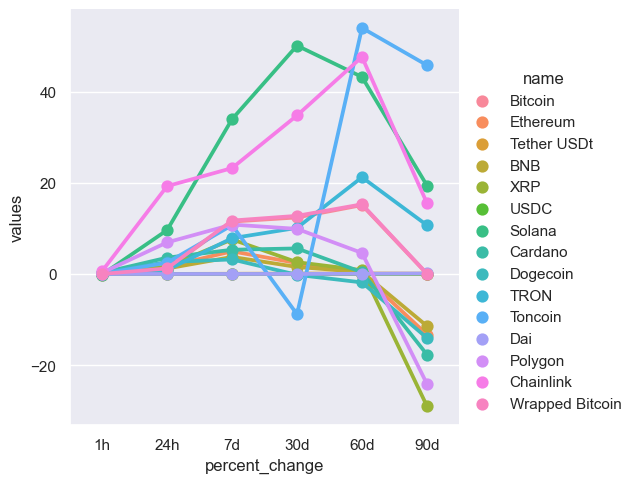

In [153]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [172]:
df7

,name,percent_change,values
0,Bitcoin,1h,-0.07448
1,Bitcoin,24h,1.14173
2,Bitcoin,7d,11.48812
3,Bitcoin,30d,12.39465
4,Bitcoin,60d,15.10693
5,Bitcoin,90d,0.01613
6,Ethereum,1h,-0.28160
7,Ethereum,24h,1.61552
8,Ethereum,7d,4.96323
9,Ethereum,30d,2.38134


In [173]:
df10 = df7[['name','percent_change','values']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,percent_change,values
0,Bitcoin,1h,-0.07448
1,Bitcoin,24h,1.14173
2,Bitcoin,7d,11.48812
3,Bitcoin,30d,12.39465
4,Bitcoin,60d,15.10693
5,Bitcoin,90d,0.01613


<Axes: xlabel='percent_change', ylabel='values'>

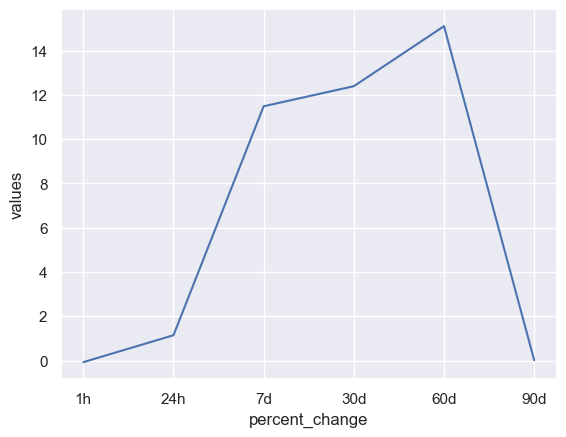

In [177]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='percent_change', y='values', data=df10)